# Servo Data Analysis

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# data info
FILE_NAME = "/home/joao/Documents/repo/graspe-v3/graspe-v3/graspe-py/logs/data/servo_test/2025_08_28_dados.csv"
FREQ_HZ = 200 # hz
DT = 1/FREQ_HZ # ms7

# plot config (if END_TIME < BEGIN_TIME, it plot all data)
BEGIN_TIME = 8
END_TIME = 13

# reading data
df = pd.read_csv(FILE_NAME)
time = df.index * DT

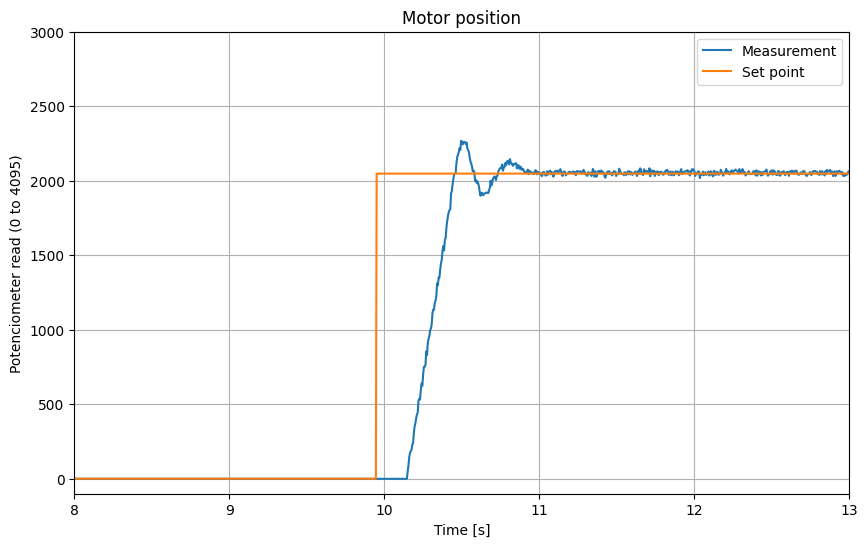

In [47]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["pot"], label="Measurement")
plt.plot(time, df["set_point"], label="Set point")
plt.xlabel("Time [s]")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
plt.legend()
plt.grid(True)
if BEGIN_TIME < END_TIME:
    plt.xlim(BEGIN_TIME, END_TIME)
plt.ylim(-100, 3000)
plt.show()

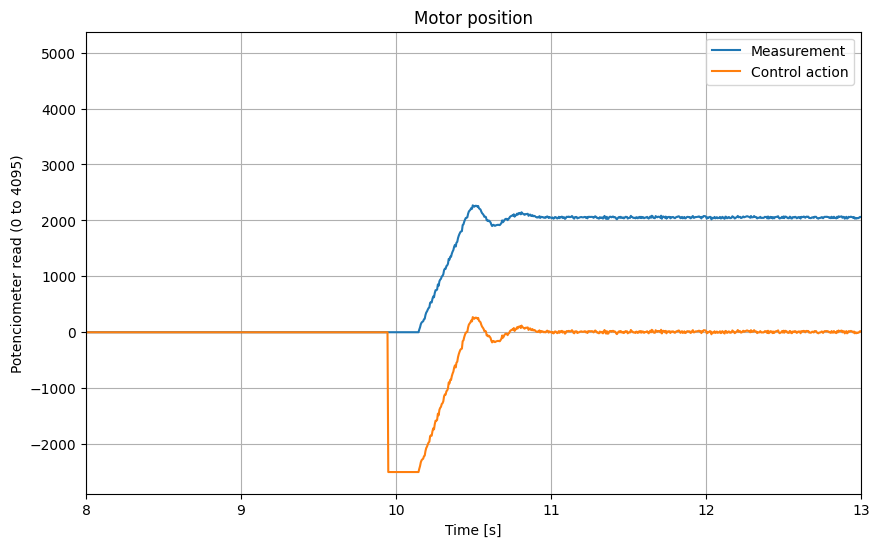

In [48]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["pot"], label="Measurement")
plt.plot(time, df["control"], label="Control action")
plt.xlabel("Time [s]")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
plt.legend()
plt.grid(True)
if BEGIN_TIME < END_TIME:
    plt.xlim(BEGIN_TIME, END_TIME)
plt.show()

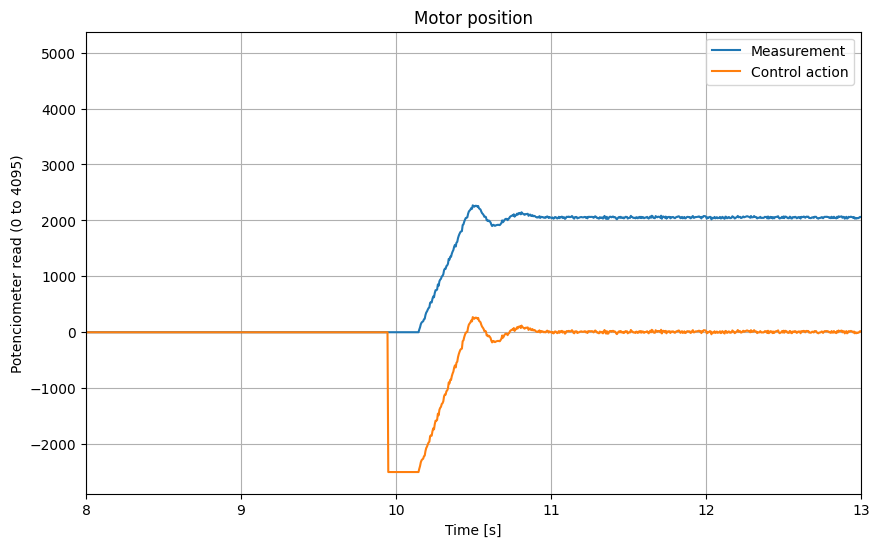

In [49]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["pot"], label="Measurement")
plt.plot(time, df["control"], label="Control action")
plt.xlabel("Time [s]")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
plt.legend()
plt.grid(True)
if BEGIN_TIME < END_TIME:
    plt.xlim(BEGIN_TIME, END_TIME)
plt.show()

In [50]:

# data info
FILE_NAME = "/home/joao/Documents/repo/graspe-v3/graspe-v3/graspe-py/logs/data/servo_test/potenciometer_data.csv"
df = pd.read_csv(FILE_NAME)
time = df.index * DT

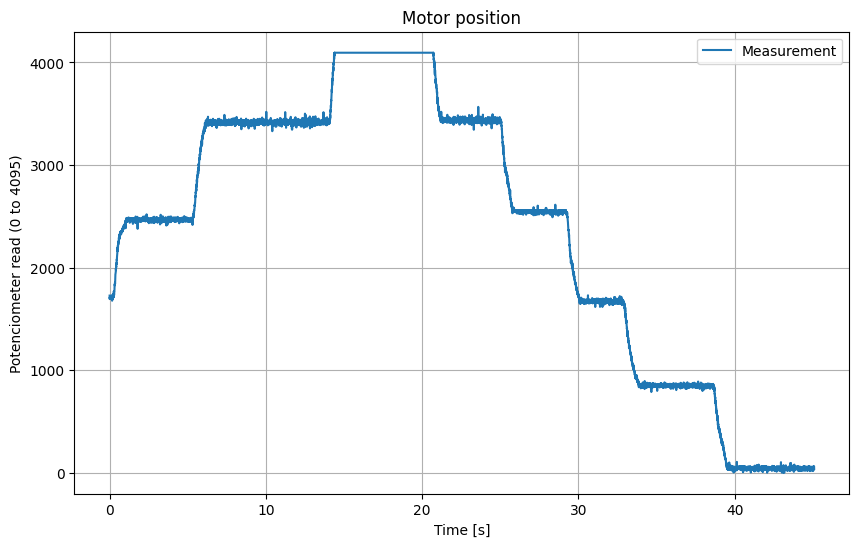

In [51]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["pot"], label="Measurement")
plt.xlabel("Time [s]")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
# 180 degrees
data_180 = df["pot"].values[int(21.5/DT):int(25/DT)]
print(data_180[1])

print(data_180.mean())
print(data_180.std())

3439
3437.634285714286
17.445686210262377


In [53]:
# 180 degrees
data_135 = df["pot"].values[int(25.8/DT):int(29.3/DT)]
print(data_135[1])

print(data_135.mean())
print(data_135.std())

2551
2545.1657142857143
11.937263214875697


In [54]:
# 180 degrees
data_90 = df["pot"].values[int(30.0/DT):int(32.8/DT)]
print(data_90[1])

print(data_90.mean())
print(data_90.std())

1717
1672.5992844364937
15.012829320640664


In [55]:
# 180 degrees
data_45 = df["pot"].values[int(34.0/DT):int(38.6/DT)]
print(data_45[1])

print(data_45.mean())
print(data_45.std())

853
849.1097826086957
11.00246572940148


In [56]:
data_0 = df["pot"].values[int(39.5/DT):]
print(data_0[1])

print(data_0.mean())
print(data_0.std())

52
43.45885509838998
12.362069321197016


In [57]:
std  = np.mean([data_0.std(), data_45.std(), data_90.std(), data_135.std(), data_180.std()])

print(std)
print(np.std([data_0.std(), data_45.std(), data_90.std(), data_135.std(), data_180.std()]))

13.552062759275447
2.3587390483427217


In [58]:
# Inicialização
sigma_z = std                 # desvio padrão do sensor
R = sigma_z**2                # variância da medição
Q = 5.0                      # variância do processo (ajuste este valor!)
x = np.mean(df["pot"].values[0:20])                       # chute inicial da posição
P = 1.0e-3                       # incerteza inicial

def kalman_update(z):
    global x, P
    # --- Predição ---
    x_pred = x
    P_pred = P + Q

    # --- Correção ---
    K = P_pred / (P_pred + R)
    x = x_pred + K * (z - x_pred)
    P = (1 - K) * P_pred

    return x

In [59]:
estimate = []

for data in df["pot"]:
    estimate.append(kalman_update(data))


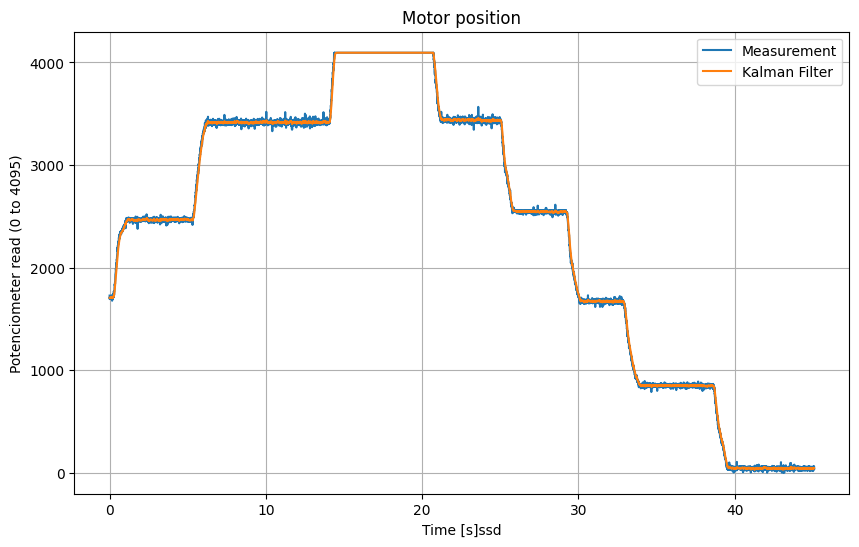

In [60]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["pot"], label="Measurement")
plt.plot(time, estimate, label="Kalman Filter")
plt.xlabel("Time [s]ssd")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
# plt.xlim(4, 7)
# plt.ylim(2000, 3500)
plt.legend()
plt.grid(True)
plt.show()

In [61]:
# data info
FILE_NAME = "/home/joao/Documents/repo/graspe-v3/graspe-v3/graspe-py/logs/data/servo_test/pot_data_2.csv"
df = pd.read_csv(FILE_NAME)
time = df.index * DT

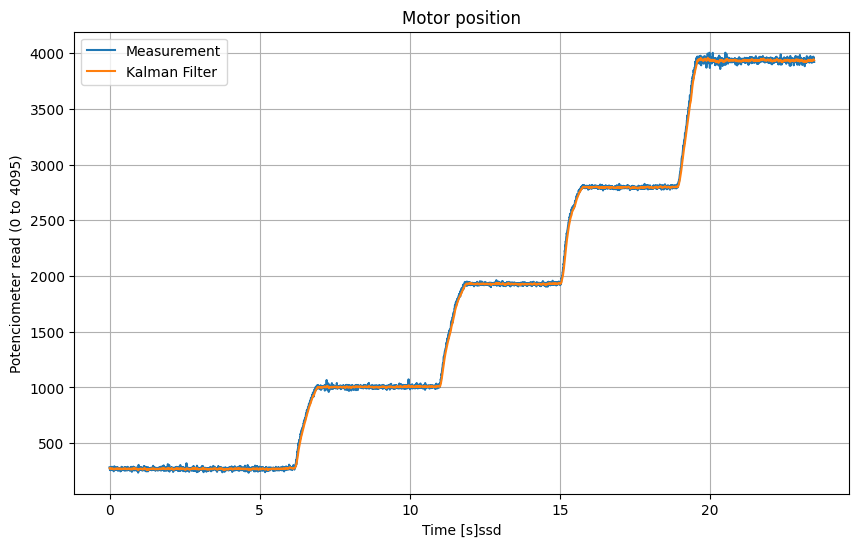

In [62]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["pot"], label="Measurement")
plt.plot(time, df["kalman"], label="Kalman Filter")
plt.xlabel("Time [s]ssd")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
# plt.xlim(4, 7)
# plt.ylim(2000, 3500)
plt.legend()
plt.grid(True)
plt.show()

In [63]:
data_0 = df["kalman"].values[int(0.0/DT):int(5.0/DT)]
print(data_0.mean())
print(data_0.std())

data_180 = df["kalman"].values[int(20.0/DT):]
print(data_180.mean())
print(data_180.std())

269.249
2.8679259055979807
3934.176724137931
5.45636596083994


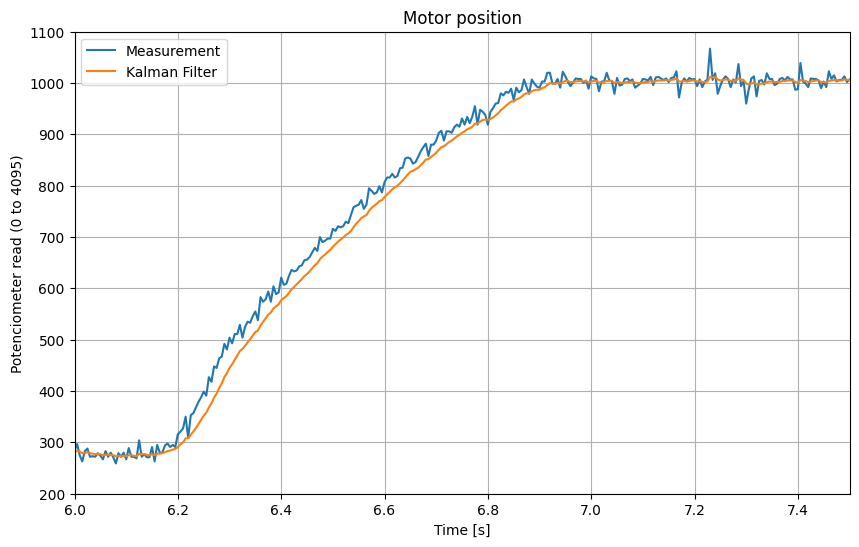

In [64]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["pot"], label="Measurement")
plt.plot(time, df["kalman"], label="Kalman Filter")
plt.xlabel("Time [s]")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
plt.xlim(6.0, 7.5)
#plt.xlim(0.0, 5.0)
plt.ylim(200, 1100)
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# data info
FILE_NAME = "/home/joao/Documents/repo/graspe-v3/graspe-v3/graspe-py/logs/data/servo_test/pot_data_3.csv"
df = pd.read_csv(FILE_NAME)
time = df.index * DT

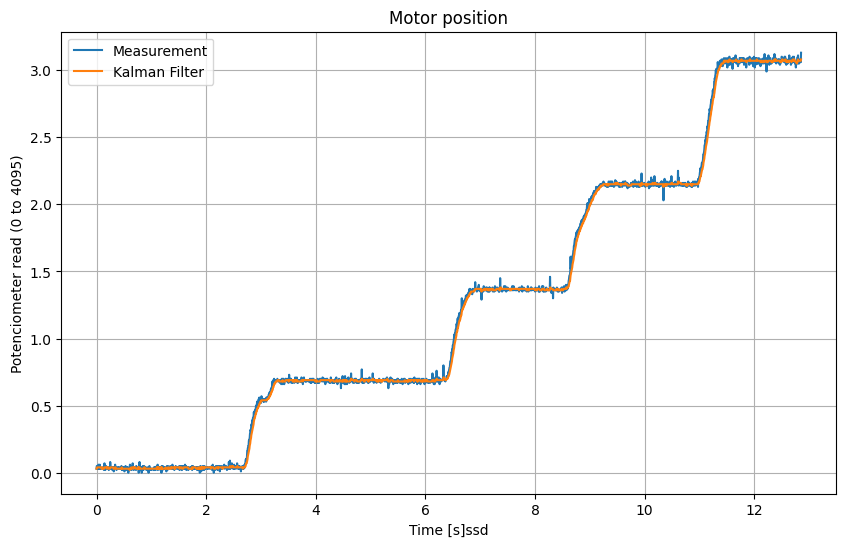

In [66]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["angle"], label="Measurement")
plt.plot(time, df["kalman"], label="Kalman Filter")
plt.xlabel("Time [s]ssd")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
# plt.xlim(2, 4)
# plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

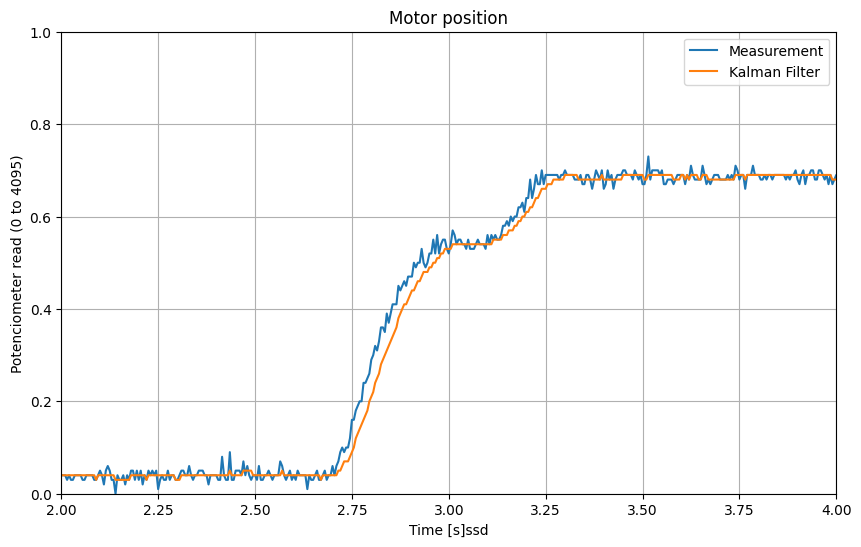

In [67]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, df["angle"], label="Measurement")
plt.plot(time, df["kalman"], label="Kalman Filter")
plt.xlabel("Time [s]ssd")
plt.ylabel("Potenciometer read (0 to 4095)")
plt.title(f"Motor position")
plt.xlim(2, 4)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()